# 多元线性回归/对数线性回归（二选一）

## 一、多元线性回归
这部分的内容是要求大家完成多元线性回归，我们会先带着大家使用sklearn做一元线性回归的十折交叉验证，多元线性回归大家可以仿照着完成

### 1. 读取数据

In [1]:
import numpy as np

In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
Garag

### 2. 引入模型

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import metrics


### 3. 使用sklearn完成一元线性回归的十折交叉验证验证

#### 创建模型

In [4]:
model = LinearRegression()

#### 选取数据

In [5]:
features = ['LotArea']
x = data[features]
y = data['SalePrice']

#### 做十折交叉验证的预测

In [6]:
prediction = cross_val_predict(model, x, y, cv = 10)

这十折交叉验证是按顺序做的，会先将前10%的数据作为测试集，然后会往后顺延到10%到20%，最后将这十份的预测值按顺序拼接后返回

In [7]:
prediction.shape

(1460,)

### 4. 计算评价指标

#### MAE

In [8]:
mean_absolute_error(prediction, data['SalePrice'])

55394.44195244894

#### RMSE

In [9]:
mean_squared_error(prediction, data['SalePrice']) ** 0.5

77868.51337752416

### 5. 请你选择多种特征进行组合，完成多元线性回归，并对比不同的特征组合，它们训练出的模型在十折交叉验证上MAE与RMSE的差别，至少完成3组

###### 扩展：多项式回归（一元线性回归的扩展），尝试对部分特征进行变换，如将其二次幂，三次幂作为特征输入模型，观察模型在预测能力上的变化
###### 提示：多元线性回归，只要在上方的features这个list中，加入其他特征的名字就可以

['YearRemodAdd', 'GarageArea', 'BsmtUnfSF', 'LotArea', 'BsmtFinSF1', '1stFlrSF']
33633.51528639514 50624.92532376102
['YearRemodAdd', 'GarageArea', 'BsmtUnfSF', 'LotArea', 'BsmtFinSF1']
34237.30487928096 51802.00155511693
['GarageArea', 'BsmtUnfSF', 'LotArea', 'BsmtFinSF1']
37704.29378046433 55821.24702502259
['GarageArea', 'BsmtUnfSF', 'BsmtFinSF1']
38335.816354938695 56209.29973638569


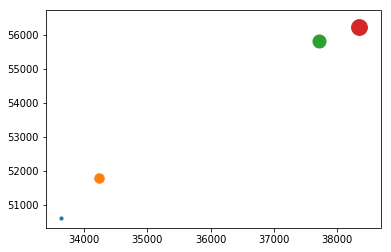

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
features = ['YearRemodAdd', 'GarageArea', 'BsmtUnfSF', 'LotArea', 'TotalBsmtSF', 'BsmtFinSF1','1stFlrSF']
model = LinearRegression()
for i in range(4):
    features.pop(random.randint(0, len(features)-1))
    print(features)
    # data[features[0]]=np.square(data[features[0]])
    x = data[features]
    y = data['SalePrice']
    prediction = cross_val_predict(model, x, y, cv=10)
    ab_error = mean_absolute_error(prediction, data['SalePrice'])
    squ_error = mean_squared_error(prediction, data['SalePrice']) ** 0.5
    print(ab_error, squ_error)
    plt.scatter(ab_error,squ_error,10+80*i)
plt.show()

###### 双击此处填写
1. 模型1使用的特征：['YearRemodAdd', 'GarageArea', 'BsmtUnfSF', 'LotArea', 'BsmtFinSF1', '1stFlrSF']
2. 模型2使用的特征：['YearRemodAdd', 'GarageArea', 'BsmtUnfSF', 'LotArea', 'BsmtFinSF1']
3. 模型3使用的特征:['GarageArea', 'BsmtUnfSF', 'LotArea', 'BsmtFinSF1']
4. 模型4使用的特征:['GarageArea', 'BsmtUnfSF', 'BsmtFinSF1']

模型|MAE|RMSE
-|-|-
模型1 | 33633.51528639514  |50624.92532376102
模型2 |34237.30487928096  |51802.00155511693
模型3 | 37704.29378046433 |55821.24702502259
模型4 | 38335.816354938695 |56209.29973638569

最大的球表示第4个模型，最小的表示第一个模型